<a href="https://colab.research.google.com/github/KalSun3/Group-1---Sleep-Prediction-Model/blob/main/Group_1_Project_4_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
# Import and read CSV file

#collab
sleepy_url = "https://raw.githubusercontent.com/KalSun3/Group-1---Sleep-Prediction-Model/refs/heads/main/Data_Preparation/sleepytime_db.csv"


sleeptime_df = pd.read_csv(sleepy_url)
sleeptime_df.head()


#using jupyter
#sleeptime_df = pd.read_csv("Data_Preparation/sleepytime_db.csv")
#sleeptime_df.head()

,workouttime,readingtime,phonetime,workhours,caffeineintake,relaxationtime,sleeptime
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50


In [9]:
# Assuming you have a DataFrame `sleeptime_df` and the column names match the ones in the picture.
columns_to_check = ['workouttime', 'readingtime', 'phonetime', 'workhours', 'caffeineintake', 'relaxationtime', 'sleeptime']

# Loop through each column to calculate outliers
for column in columns_to_check:
    Q1 = np.percentile(sleeptime_df[column], 25) # First quartile
    Q3 = np.percentile(sleeptime_df[column], 75) # Third quartile
    IQR = Q3 - Q1
    # Determine outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = sleeptime_df[(sleeptime_df[column] < lower_bound) | (sleeptime_df[column] > upper_bound)]

# Print the outliers
print(f"Outliers in column '{column}':")
print(outliers if not outliers.empty else "No outliers found")
print("-" * 50)

Outliers in column 'sleeptime':
      workouttime  readingtime  phonetime  workhours  caffeineintake  \
10           0.06         0.07       1.14       8.82          251.82   
35           2.43         0.70       4.95       5.41           29.69   
159          2.18         1.50       3.26       9.02          234.99   
187          1.67         1.53       3.31       5.78          280.84   
212          1.96         0.04       3.18       6.41            4.75   
...           ...          ...        ...        ...             ...   
1877         1.53         1.76       3.68       6.32          111.67   
1891         1.20         1.06       3.34       7.02           25.28   
1901         0.02         0.76       3.17       5.33          111.90   
1941         1.00         1.80       1.94       7.85           16.17   
1989         2.19         1.74       4.29       9.03          244.75   

      relaxationtime  sleeptime  
10              1.77      15.94  
35              0.69       8.71  
1

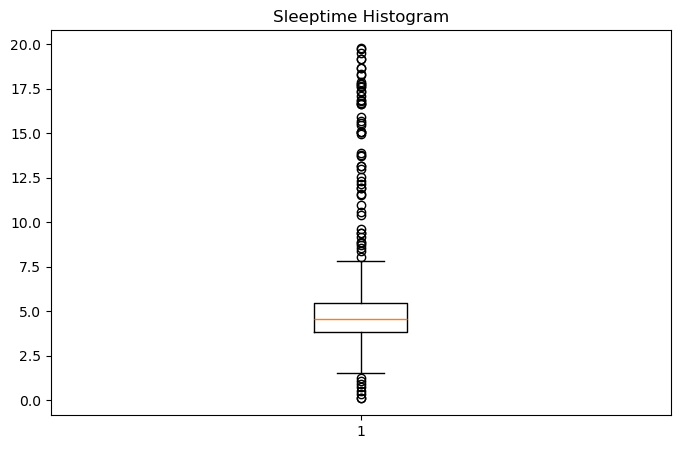

In [ ]:
# Create Histogram
plt.figure(figsize=(8, 5))
plt.boxplot(sleeptime_df['sleeptime'], showfliers=True)
plt.title('Sleeptime Histogram')
plt.show()


In [3]:
# Separate the data into labels and features
X = sleeptime_df.drop(columns=['sleeptime'])  #feature
y = sleeptime_df['sleeptime']  #target variable

In [4]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Create a StandardScaler
scaler = StandardScaler()

# Fit StandardScaler
X_scaler = scaler.fit(X_train)

# Scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")



Training set shape: (1600, 6)
Test set shape: (400, 6)


In [7]:

# Train the model using random forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

#model = LinearRegression()
#model.fit(X_train_scaled, y_train)




RandomForestRegressor(random_state=42)

In [12]:
# Make a prediction
y_pred = model.predict(X_test)


In [13]:
#Evaluate the model for random forest
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


#Evaluate the model using regression


#print(f"Mean Squared Error: {mse}")

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 5.02
R-squared (R2 Score): 0.11


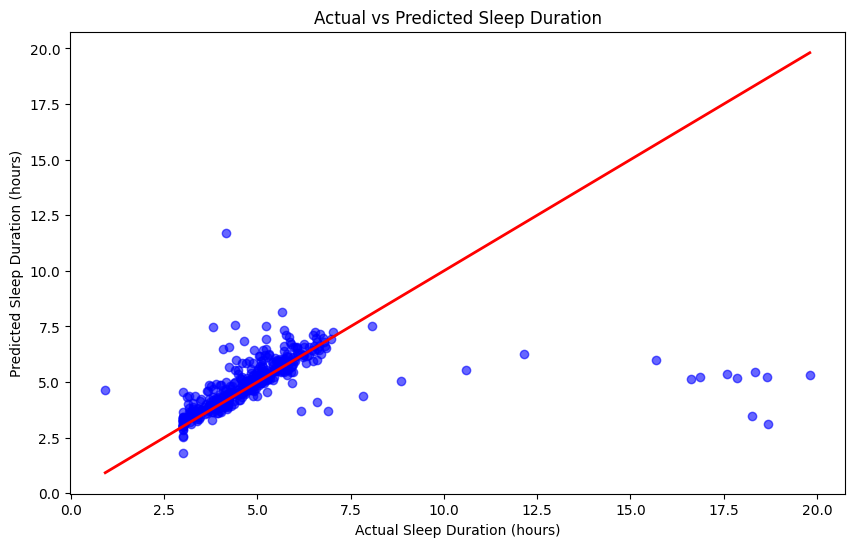

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Sleep Duration')
plt.xlabel('Actual Sleep Duration (hours)')
plt.ylabel('Predicted Sleep Duration (hours)')
plt.show()